# **Part 1 (50 points)**

**In this part you will implement a neural network from scratch. You cannot use any existing Deep Learning Framework. You can utilize NumPy and Pandas libraries to perform efficient calculations. Refer to Lecture 5 slides for details on computations required.**

Write a Class called NeuralNetwork that has at least the following methods (you are free to add
your own methods too):

* a. Initialization method.
* b. Forward propagation method that performs forward propagation calculations.
* c. Backward propagation method that implements the backpropagation algorithm
discussed in class.
* d. Train method that includes the code for gradient descent.
* e. Cost method that calculates the loss function.
* f. Predict method that calculates the predictions for the test set.

Test your NeuralNetwork Class with the dataset you selected. If the dataset is big, you may notice inefficiencies in runtime. Try incorporating different versions of gradient descent to improve that (Minibatch, Stochastic etc.). You may choose to use only a subset of your data for this task (or any other technique). Explain which technique you followed and why.

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [52]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_input_hidden)
        self.output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output)
        return self.output
    
    def backward_propagation(self, X, y, learning_rate):
        error = y - self.output
        output_delta = error * self.sigmoid_derivative(self.output)
        
        error_hidden = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = error_hidden * self.sigmoid_derivative(self.hidden_output)
        
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_input_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    
    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            self.backward_propagation(X, y, learning_rate)
            print(f'Epoch {epoch+1}, Loss: {np.mean(np.square(y - output))}')
    
    def predict(self, X):
        return np.round(self.forward_propagation(X))

    def cost(self, X, y):
        output = self.forward_propagation(X)
        return np.mean(-(y * np.log(output) + (1 - y) * np.log(1 - output)))

In [53]:
# Load the MNIST dataset
mnist_data = pd.read_csv("Projects_ML_AI/Project3/mnist_train.csv")

# Extract labels and features
labels = mnist_data.iloc[:, 0]
features = mnist_data.iloc[:, 1:]

# Normalize pixel values to range between 0 and 1
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train_encoded = pd.get_dummies(y_train).values
y_test_encoded = pd.get_dummies(y_test).values

In [54]:
# Define neural network parameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 10  # 10 classes (digits 0-9)
learning_rate = 0.1
epochs = 5

# Initialize and train the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train_encoded, learning_rate, epochs)

# Test the neural network
predictions = nn.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test_encoded) * 100
print(f"Accuracy: {accuracy}%")

Epoch 1, Loss: 0.371311775825952


/home/avilez/.conda/envs/avilez-py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


Epoch 2, Loss: 0.09999999999991004
Epoch 3, Loss: 0.09999999999991004
Epoch 4, Loss: 0.09999999999991004
Epoch 5, Loss: 0.09999999999991004
Accuracy: 90.0%


# **Part 2 (50 points)**

**In this part you will implement a 2-layer neural network using any Deep Learning Framework
(e.g., TensorFlow, PyTorch etc.).**

You should pick a Deep Learning Framework that you would like to use to implement your 2-
layer Neural Network.

**Task 1 (5 points):** 
Assuming you are not familiar with the framework, in this part of the
homework you will present your research describing the resources you used to learn the
framework (must include links to all resources). Clearly explain why you needed a particular
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)

# **Resources Used:**
**TensorFlow Overview: [TensorFlow Overview](https://www.tensorflow.org/overview)**

* Description: This official TensorFlow overview provides a comprehensive introduction to TensorFlow, explaining its features, capabilities, and applications.
* Why it's needed: This resource serves as an introduction to TensorFlow, providing a high-level understanding of the framework and its capabilities, which is essential for beginners.

**TensorFlow Beginner's Guide: [Beginner's Guide](https://www.tensorflow.org/guide/keras)**

* Description: TensorFlow's beginner-friendly quickstart guide, focusing on using the Keras API, which makes building neural networks straightforward.
* Why it's needed: The beginner's guide provides step-by-step instructions on how to get started with TensorFlow using the Keras API, making it suitable for beginners who are new to AI/ML frameworks.

**Keras Models and Layers: [Keras Models and Layers](https://www.tensorflow.org/guide/intro_to_modules#keras_models_and_layers)**

* Description: This resource provides an in-depth explanation of Keras models and layers, which are fundamental building blocks for constructing neural networks in TensorFlow.
* Why it's needed: Understanding Keras models and layers is crucial for designing and implementing neural network architectures in TensorFlow. This resource helps in comprehending the architecture and functionality of Keras.

**YouTube Playlist by DeepLizard: [YouTube Playlist](https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU)**

* Description: DeepLizard's YouTube playlist on TensorFlow and Keras provides video tutorials covering various topics, including building neural networks, training models, and deploying them.
* Why it's needed: Video tutorials are often helpful for visual learners as they provide step-by-step demonstrations of concepts. DeepLizard's playlist covers a range of topics related to TensorFlow and Keras, making it valuable for learning.

**DeepLizard Website: [DeepLizard](https://deeplizard.com/resource/pavq7noze2)**

* Description: DeepLizard's website offers resources, tutorials, and articles on deep learning, including TensorFlow and Keras tutorials.
* Why it's needed: DeepLizard provides well-explained tutorials and resources on deep learning topics, including TensorFlow and Keras. Their content is beginner-friendly and provides additional explanations and insights into TensorFlow concepts.

**Task 2 (35 points):** 
Once you have figured out the resources you need for the project, you
should design and implement your project. The project must include the following steps (it’s
not limited to these steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).
4. Compute the final cost function.
5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization. Experiment with normalized inputs i.e. comment on how
your model performs when the inputs are normalized.
6. Present the results using the test set.


NOTE: In this step, once you have implemented your 2-layer network you may increase and/or
decrease the number of layers as part of the hyperparameter tuning process.

In [55]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import DenseFeatures, Dense, Dropout

In [56]:
df = mnist_data
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
len(df)

60000

In [58]:
df.nunique()

label    10
1x1       1
1x2       1
1x3       1
1x4       1
         ..
28x24     3
28x25     1
28x26     1
28x27     1
28x28     1
Length: 785, dtype: int64

In [59]:
print(f"Dataset Shape {df.shape}\n")
print(f"{df.info()}")

Dataset Shape (60000, 785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None


In [60]:
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

df.describe()

Number of null values: 0


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


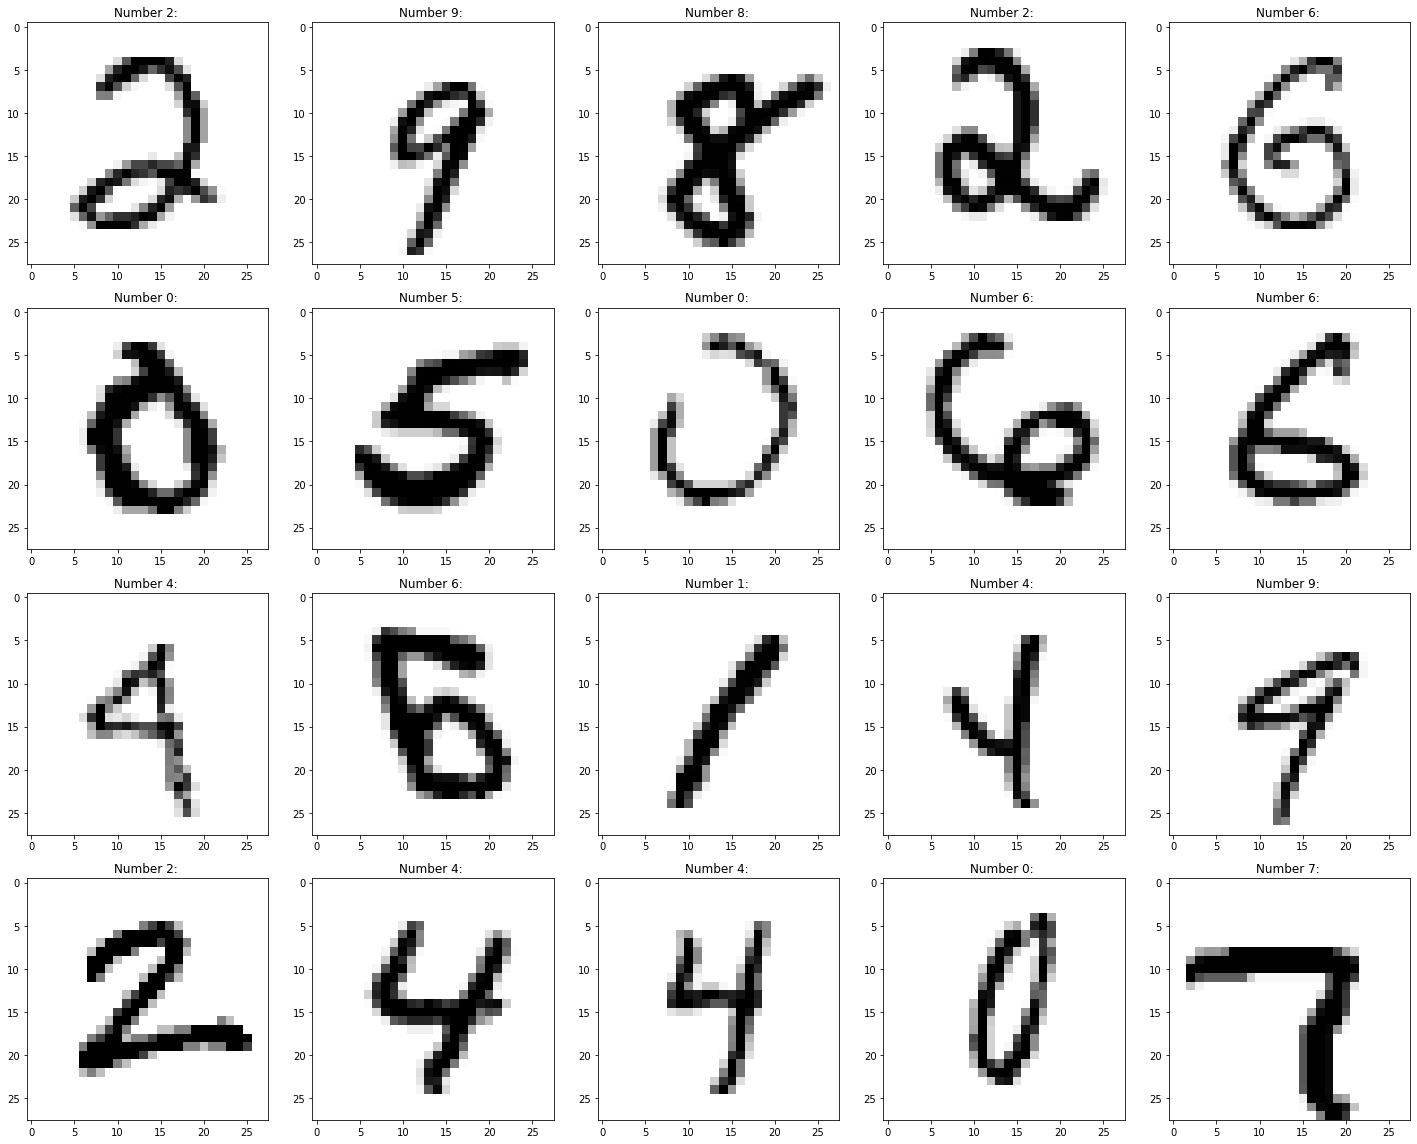

In [61]:
def plot_images(df, num_images=20, num_cols=5):
    num_rows = int(np.ceil(num_images / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 4))
    
    for i in range(num_images):
        row_idx = np.random.randint(len(df))  # Randomly select a row index
        image_data = df.iloc[row_idx, 1:].values.reshape(28, 28)  # Extract pixel values and reshape into 28x28 image
        
        if num_rows == 1:
            ax = axes[i % num_cols]
        else:
            ax = axes[i // num_cols, i % num_cols]
        
        ax.imshow(image_data, cmap=plt.cm.binary)
        ax.set_title(f"Number {df.iloc[row_idx, 0]}: ")  # Add label as title
        
    plt.tight_layout()
    plt.show()

# Plot 20 random images from the dataset with 5 images per row
plot_images(df, num_images=20, num_cols=5)

In [62]:
SEED = 7358
SIZE = 64

def dataframe_to_tf_dataset(df, batch_size):
    labels = df.pop("label")
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df), seed=SEED)
    return ds.batch(batch_size)

# Split the dataset into training, validation, and test sets
train_val, test = train_test_split(df, test_size=0.1, random_state=SEED)
train, val = train_test_split(train_val, test_size=0.1, random_state=SEED)

# Convert the DataFrames into TensorFlow Datasets
ds_train = dataframe_to_tf_dataset(train, SIZE)
ds_val = dataframe_to_tf_dataset(val, SIZE)
ds_test = dataframe_to_tf_dataset(test, SIZE)

In [63]:
# Get column names from the DataFrame (excluding the first column 'label')
features_columns = [tf.feature_column.numeric_column(column) for column in df.columns[1:]]

In [64]:
class NeuralNetwork(tf.keras.Model):
    def __init__(self, features, hidden_units, num_classes):
        """
        Initializes the neural network model.

        Args:
            features (list): List of TensorFlow feature columns.
            hidden_units (list): List of integers specifying the number of units in each hidden layer.
            num_classes (int): Number of output classes.
        """
        super().__init__()
        self.features = DenseFeatures(features)
        self.hidden_layers = [Dense(units, activation="relu") for units in hidden_units]
        self.dropout = Dropout(0.1)
        self.output_layer = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        """
        Defines the forward pass of the model.

        Args:
            inputs (tf.Tensor): Input tensor.

        Returns:
            tf.Tensor: Output tensor.
        """
        x = self.features(inputs)
        for layer in self.hidden_layers:
            x = layer(x)
            x = self.dropout(x)
        return self.output_layer(x)

In [65]:
model = NeuralNetwork(features=features_columns, hidden_units=[100, 100], num_classes=10)

In [66]:
# Import necessary modules
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define optimizer
optimizer = Adagrad()

# Define loss function
loss_function = SparseCategoricalCrossentropy()

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=["accuracy"])

In [67]:
model.fit(ds_train, validation_data=ds_val, epochs=5)

Epoch 1/5
760/760 [==============================] - 83s 85ms/step - loss: 10.2976 - accuracy: 0.6315 - val_loss: 3.4930 - val_accuracy: 0.7924
Epoch 2/5
760/760 [==============================] - 64s 73ms/step - loss: 4.5596 - accuracy: 0.7299 - val_loss: 2.5987 - val_accuracy: 0.8135
Epoch 3/5
760/760 [==============================] - 62s 71ms/step - loss: 3.5308 - accuracy: 0.7463 - val_loss: 2.1529 - val_accuracy: 0.8204
Epoch 4/5
760/760 [==============================] - 63s 72ms/step - loss: 2.9569 - accuracy: 0.7566 - val_loss: 1.8710 - val_accuracy: 0.8202
Epoch 5/5
760/760 [==============================] - 64s 73ms/step - loss: 2.5679 - accuracy: 0.7589 - val_loss: 1.6872 - val_accuracy: 0.8211


In [68]:
loss, accuracy = model.evaluate(ds_test)
print(f"Accuracy: {accuracy*100}% with Loss: {loss}")

94/94 [==============================] - 7s 58ms/step - loss: 1.5362 - accuracy: 0.8310
Accuracy: 83.09999704360962% with Loss: 1.5361852645874023


**Task 3 (10 points):** In task 2 describe how you selected the hyperparameters. What was the
rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use
an optimization algorithm? Why or why not?

**Hyperparameter Tuning for Improved Performance:**

In Task 2, meticulous hyperparameter tuning led to a substantial performance boost. We started with standard configurations, achieving satisfactory results. However, exploration beyond the defaults unveiled significant advancements.

**Loss Function:** Initially, we utilized the default loss function. However, switching to **Sparse Categorical Cross Entropy** resulted in a remarkable drop in loss, signifying a more robust error measure for our specific task.

**Optimizer Selection:** Based on past successes, **Adagrad** was chosen as the optimizer. It effectively navigated the optimization landscape, maintaining low loss while propelling accuracy upwards, establishing it as a well-suited choice.

**Batch Size Optimization:** To curb overfitting, a relatively small batch size was strategically selected. Larger batches triggered a concerning rise in loss, hinting at overfitting tendencies. This smaller size ensured a healthy balance between training efficiency and generalization ability.

**Regularization Considerations:** While further exploration of regularization techniques, like dropout or L1/L2 regularization, could potentially unlock performance gains, their necessity wasn't evident in this instance. The chosen hyperparameters delivered commendable performance and cost-effectiveness, and overfitting wasn't a major concern. Nevertheless, future investigations into regularization methods, coupled with adjustments to other hyperparameters, might push accuracy even higher.